In [10]:
from NLPCA import NLPCA

相空间轨迹已保存到文件：harmonic_oscillator_trajectory.csv


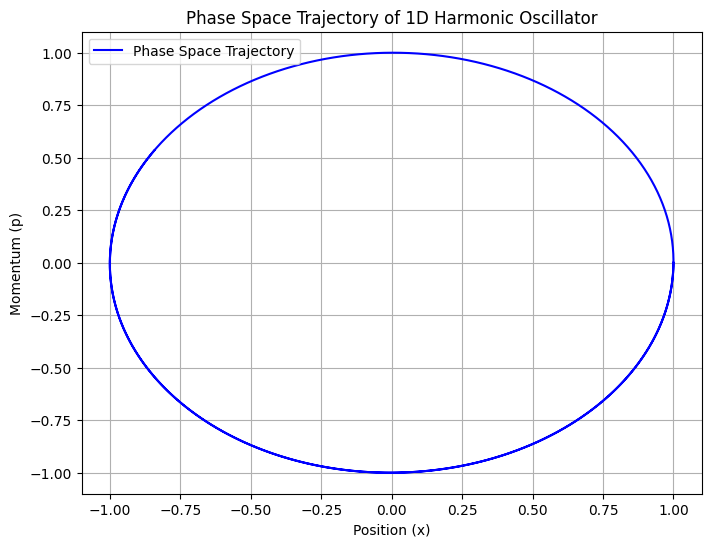

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 定义谐振子参数
m = 1.0  # 质量 (kg)
k = 1.0  # 劲度系数 (N/m)
omega = np.sqrt(k / m)  # 固有角频率 (rad/s)

# 初始条件
x0 = 1.0  # 初始位置 (m)
p0 = 0.0  # 初始动量 (kg·m/s)
t_max = 10.0  # 模拟时间 (s)
dt = 0.01  # 时间步长 (s)

# 时间点
t = np.arange(0, t_max, dt)

# 初始化位置和动量数组
x = np.zeros_like(t)
p = np.zeros_like(t)

# 设置初始值
x[0] = x0
p[0] = p0

# 数值积分（使用简单的欧拉方法）
for i in range(1, len(t)):
    # 动量的变化
    p[i] = p[i - 1] - k * x[i - 1] * dt
    # 位置的变化
    x[i] = x[i - 1] + (p[i] / m) * dt

# 保存相空间轨迹到 CSV 文件
data = pd.DataFrame({'Time (s)': t, 'Position (x)': x, 'Momentum (p)': p})
csv_file = 'harmonic_oscillator_trajectory.csv'
data.to_csv(csv_file, index=False)
print(f"相空间轨迹已保存到文件：{csv_file}")

# 可视化相空间轨迹
plt.figure(figsize=(8, 6))
plt.plot(x, p, label='Phase Space Trajectory', color='blue')
plt.title('Phase Space Trajectory of 1D Harmonic Oscillator')
plt.xlabel('Position (x)')
plt.ylabel('Momentum (p)')
plt.grid()
plt.legend()
plt.show()


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 加载相空间轨迹数据
csv_file = 'harmonic_oscillator_trajectory.csv'
data = pd.read_csv(csv_file)

# 提取相空间位置和动量
X = data[['Position (x)', 'Momentum (p)']].values

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 配置并初始化NLPCA模型
nlpca_model = NLPCA(
    n_components=1,  # 提取1个非线性主成分
    max_iteration=500,
    batch=32,
    verbose=1,
    random_state_1=42
)

# 训练NLPCA模型
nlpca_model.fit(X_scaled)

# 获取降维后的数据
X_transformed = nlpca_model.transform(X_scaled)
print(f"降维后的数据形状：{X_transformed.shape}")

# 将降维后的数据存储到CSV
transformed_data = pd.DataFrame(X_transformed, columns=['Nonlinear Component'])
transformed_csv = 'nlpca_transformed_trajectory.csv'
transformed_data.to_csv(transformed_csv, index=False)
print(f"降维后的数据已保存到文件：{transformed_csv}")

# 可视化结果
# 原始相空间轨迹
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.5, c='blue')
plt.title('Original Phase Space Trajectory')
plt.xlabel('Standardized Position (x)')
plt.ylabel('Standardized Momentum (p)')
plt.grid()

# 降维后的非线性主成分
plt.subplot(1, 2, 2)
plt.plot(X_transformed, alpha=0.8, c='red')
plt.title('Nonlinear Principal Component')
plt.xlabel('Time Steps')
plt.ylabel('Nonlinear Component')
plt.grid()

plt.tight_layout()
plt.show()

# 如果需要还原数据
X_reconstructed = nlpca_model.inverse_transform(X_transformed)
reconstructed_data = pd.DataFrame(X_reconstructed, columns=['Reconstructed Position (x)', 'Reconstructed Momentum (p)'])
reconstructed_csv = 'nlpca_reconstructed_trajectory.csv'
reconstructed_data.to_csv(reconstructed_csv, index=False)
print(f"还原的数据已保存到文件：{reconstructed_csv}")


ValueError: Expected `metrics` argument to be a list, tuple, or dict. Received instead: metrics=cosine_similarity of type <class 'str'>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from NLPCA import NLPCA  # 假设您之前定义的 NLPCA 类已加载

# 1. 生成一维谐振子数据
def harmonic_oscillator_data(num_samples, x_range=(-2, 2)):
    x = np.linspace(*x_range, num_samples)
    potential = 0.5 * x**2  # 简谐势能
    probability = np.exp(-potential)  # Boltzmann分布 (未归一化)
    probability /= np.sum(probability)  # 归一化
    data = np.random.choice(x, size=num_samples, p=probability)
    return data.reshape(-1, 1)  # 调整为二维数组以适配模型输入

data = harmonic_oscillator_data(1000)

# 2. 预处理数据
data_mean = np.mean(data, axis=0)
data_std = np.std(data, axis=0)
data_scaled = (data - data_mean) / data_std  # 标准化

# 3. 定义 NLPCA 模型
nlpca = NLPCA(
    n_components=1,  # 瓶颈层维度
    max_iteration=1000,  # 最大迭代次数
    verbose=1,
    function_activation_nonlinear='tanh',  # 激活函数
    batch=32  # 批量大小
)

# 4. 训练 NLPCA 模型
nlpca.fit(data_scaled)

# 5. 从瓶颈层提取主成分
nonlinear_components = nlpca.transform(data_scaled)

# 6. 可视化
plt.figure(figsize=(12, 6))

# 原始数据分布
plt.subplot(1, 2, 1)
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
plt.title('Original Harmonic Oscillator Data')
plt.xlabel('x')
plt.ylabel('Density')

# NLPCA 降维结果
plt.subplot(1, 2, 2)
plt.scatter(nonlinear_components, np.zeros_like(nonlinear_components), alpha=0.6, color='b')
plt.title('Nonlinear PCA Components')
plt.xlabel('Nonlinear Principal Component')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


ValueError: Expected `metrics` argument to be a list, tuple, or dict. Received instead: metrics=cosine_similarity of type <class 'str'>